In every company employee is the one who makes it. They do all work in a company. In a company,  the employee decides the future project and culture. A strong background of friendly environment, good salary, number of projects and long-term security are the most important factor for the employee. These factors are also the successful sign of a successful employee. Like Zig Ziglar said “You Don’t build a business. You build people, and people build the business’’. Sometimes company starts losing some of their best and innovative employee. It affects the company’s turnover and projects. Recognize what factors are responsible for an employee leaving company to take necessary steps before the employee leave and help their company to not lose a valuable employee.

$Solution$

My goal is to understand the factors which are responsible for the employee to leave the company.And try to create a model that predicts in advance that a certain employee is going to leave the company or not. So, HR department takes the necessary steps to keep their employee.


1. load the data
2. Clean the data
3. Explore the data
4. Modeling 
5. Result

In [1]:
%matplotlib inline
#Import basic packages
import numpy as np 
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from IPython.display import display
from sklearn.metrics import classification_report,confusion_matrix


/Users/sdhankhad/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Load the data

In [112]:
mydataset = pd.read_csv('HR_comma_sep.csv')

In [4]:
mydataset.shape

(14999, 10)

In [3]:
mydataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Left_rate=mydataset.left.value_counts()/len(mydataset)
#Left_rate

Same like 74% people satyed in the company and 23% people leave.

In [6]:
mydataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
mydataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

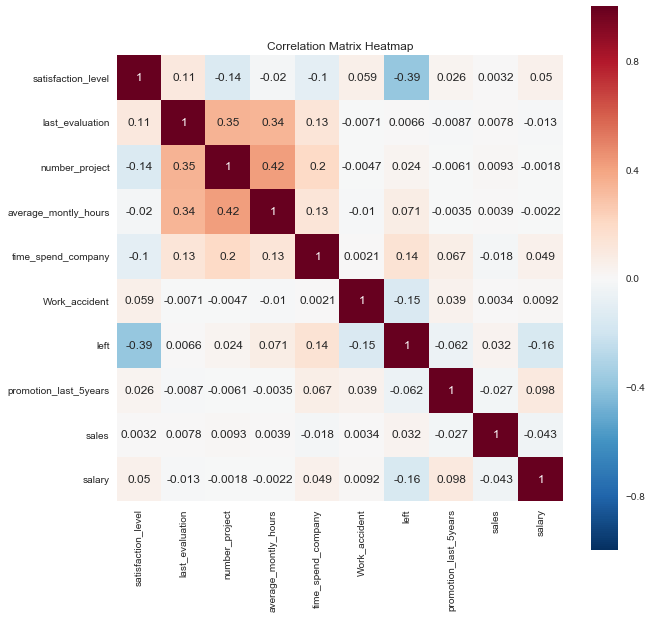

In [107]:
fig = plt.figure(figsize=(10,10))
corr = mydataset.corr()
sns.heatmap(corr, vmax=1, square=True,annot=True)
sns.plt.title('Correlation Matrix Heatmap')

In [9]:
mydataset.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [10]:
# Now we are going to use mean value and find the number of people against it.
print('there are {} employees evaluated more than 0.7'.format(len(mydataset[mydataset['last_evaluation']>0.7])))
print('there are {} employees evaluated less than 0.7'.format(len(mydataset[mydataset['last_evaluation']<=0.7])))
print('there are {} employees satisfication level more than 0.6'.format(len(mydataset[mydataset['satisfaction_level']>0.6])))
print('there are {} employees satisfication level less than 0.6'.format(len(mydataset[mydataset['satisfaction_level']<=0.6])))
print('there are {} employees have project more than 3.80'.format(len(mydataset[mydataset['number_project']>3.80])))
print('there are {} employees have project less than 3.80'.format(len(mydataset[mydataset['number_project']<=3.80])))
print('there are {} employees that spend average monthly hours more than 201.050337'.format(len(mydataset[mydataset['average_montly_hours']>201.050337])))
print('there are {} employees that spend average monthly hours less than 201.050337'.format(len(mydataset[mydataset['average_montly_hours']<=201.050337])))


there are 7802 employees evaluated more than 0.7
there are 7197 employees evaluated less than 0.7
there are 8270 employees satisfication level more than 0.6
there are 6729 employees satisfication level less than 0.6
there are 8556 employees have project more than 3.80
there are 6443 employees have project less than 3.80
there are 7389 employees that spend average monthly hours more than 201.050337
there are 7610 employees that spend average monthly hours less than 201.050337


In [11]:
mydataset.groupby(["sales","left"]).mean()

satisfaction_level  last_evaluation  number_project  \
sales       left                                                        
IT          0               0.677170         0.713050        3.756813   
            1               0.411868         0.730037        4.025641   
RandD       0               0.653799         0.706081        3.822823   
            1               0.432810         0.745372        4.024793   
accounting  0               0.647211         0.726128        3.808171   
            1               0.402598         0.694510        3.872549   
hr          0               0.666679         0.720802        3.702290   
            1               0.433395         0.679721        3.539535   
management  0               0.654861         0.723451        3.812616   
            1               0.422857         0.727253        4.142857   
marketing   0               0.669878         0.723282        3.720611   
            1               0.453153         0.692020        3.581281   
product_mng 0               0.658466         0.711435        3.795455   
            1               0.481566         0.726566        3.848485   
sales       0               0.668548         0.709223        3.789187   
            1               0.447663         0.711243        3.736686   
support     0               0.673799         0.721714        3.783751   
            1               0.450901         0.727315        3.864865   
technical   0               0.668319         0.716609        3.814632   
            1               0.432525         0.734132        4.061693   

                  average_montly_hours  time_spend_company  Work_accident  \
sales       left                                                            
IT          0               198.886792            3.356394       0.162474   
            1               213.849817            3.860806       0.032967   
RandD       0               198.951952            3.252252       0.186186   
            1               210.975207            4.000000       0.082645   
accounting  0               199.037300            3.424512       0.154529   
            1               207.029412            3.794118       0.044118   
hr          0               199.250000            3.192748       0.156489   
            1               197.306977            3.753488       0.032558   
management  0               200.233766            4.395176       0.181818   
            1               207.263736            3.758242       0.054945   
marketing   0               198.888550            3.480916       0.195420   
            1               200.990148            3.857143       0.049261   
product_mng 0               197.765625            3.330966       0.174716   
            1               207.787879            3.989899       0.045455   
sales       0               199.571657            3.443698       0.173065   
            1               205.041420            3.812623       0.045365   
support     0               199.140980            3.213859       0.187575   
            1               205.636036            3.933333       0.055856   
technical   0               198.471083            3.222442       0.172022   
            1               214.183644            3.959828       0.047346   

                  promotion_last_5years  
sales       left                         
IT          0                  0.000000  
            1                  0.010989  
RandD       0                  0.040541  
            1                  0.000000  
accounting  0                  0.024867  
            1                  0.000000  
hr          0                  0.028626  
            1                  0.000000  
management  0                  0.122449  
            1                  0.032967  
marketing   0                  0.065649  
            1                  0.000000  
product_mng 0                  0.000000  
            1                  0.000000  
sales       0                  0.029750  
  

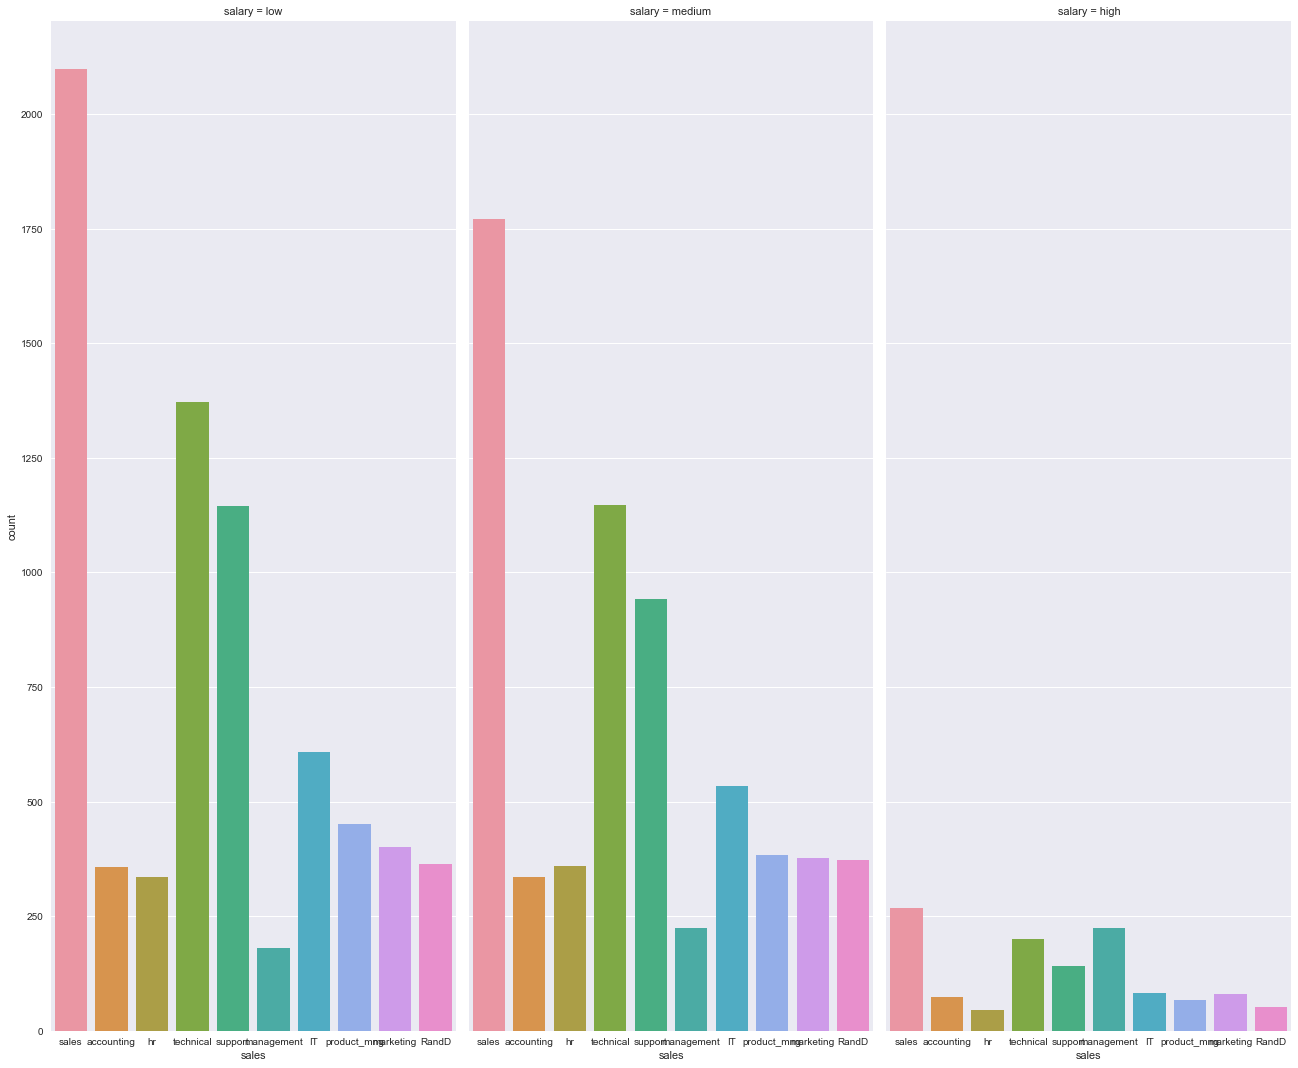

In [114]:
sns.factorplot("sales", col="salary", col_wrap=3, data=mydataset, kind="count", size=15, aspect=.4)


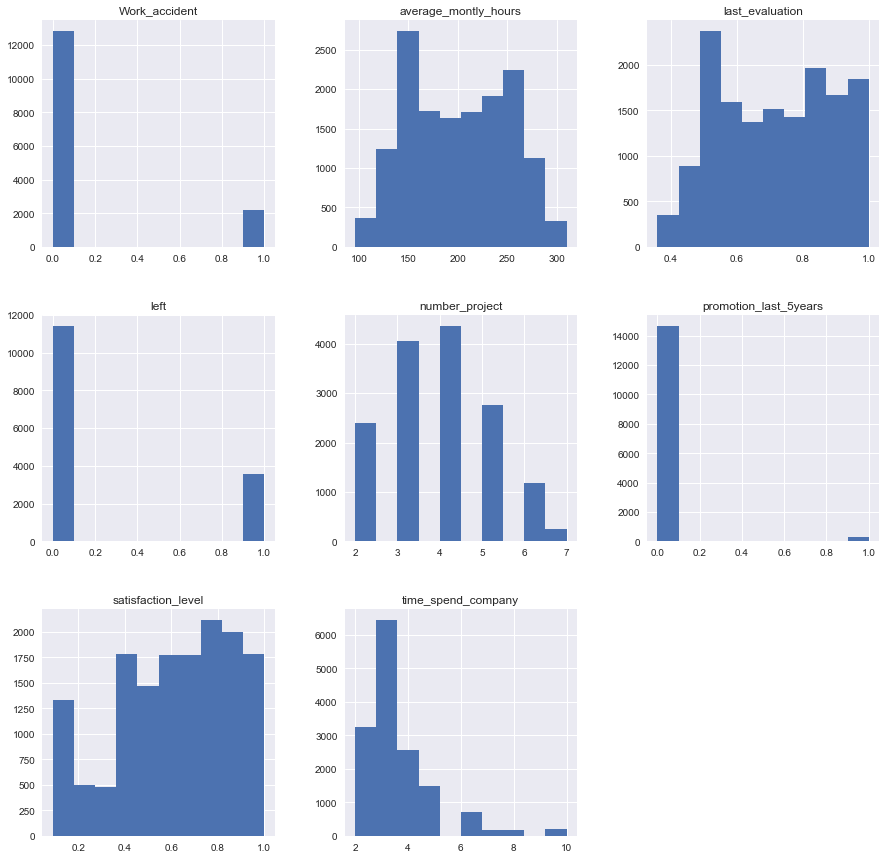

In [13]:
mydataset.hist(figsize =(15,15))
plt.show()

In [14]:
left = mydataset[mydataset.left == 1]
stay = mydataset[mydataset.left ==0 ]
print('number of people  stay ='+str(len(stay)))
print('Number of people left='+str(len(left)))


number of people  stay =11428
Number of people left=3571


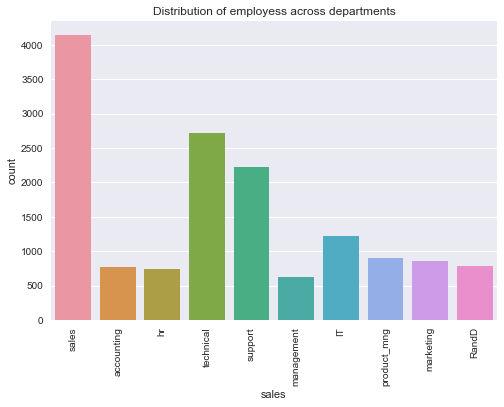

In [15]:
sns.countplot(x="sales", data=mydataset)
plt.title('Distribution of employess across departments')
plt.xticks(rotation=90);

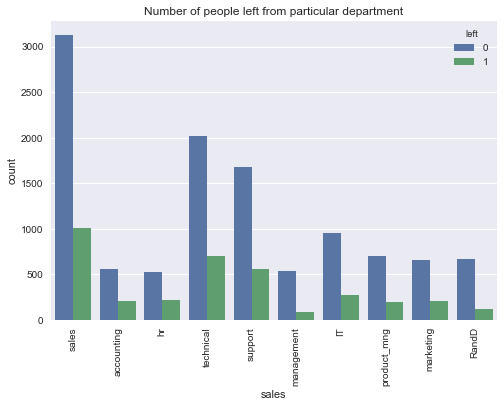

In [16]:
sns.countplot(x="sales",hue='left', data=mydataset)
plt.title('Number of people left from particular department')
plt.xticks(rotation=90);


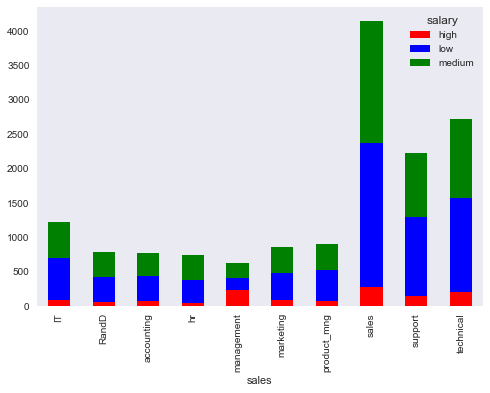

In [17]:
temp3 = pd.crosstab(mydataset['sales'], mydataset['salary'])
temp3.plot(kind='bar', stacked=True, color=['red','blue','Green'], grid=False)

Management department have the highest numbe rof employee with higher salary

### Number of project:-

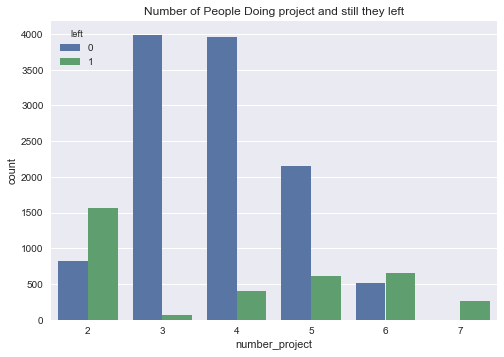

In [18]:
sns.countplot(x="number_project",hue='left', data=mydataset)
plt.title('Number of People Doing project and still they left')

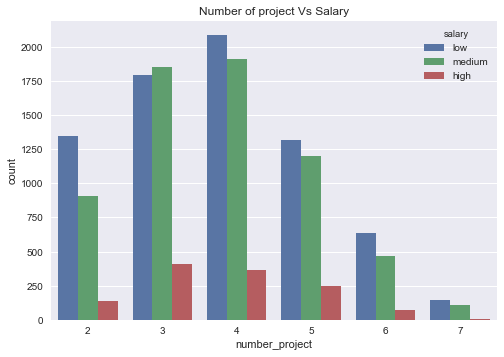

In [19]:
sns.countplot(x="number_project",hue='salary', data=mydataset)
plt.title('Number of project Vs Salary')

People are doing 3 project getting higher salary than people are doing more project.

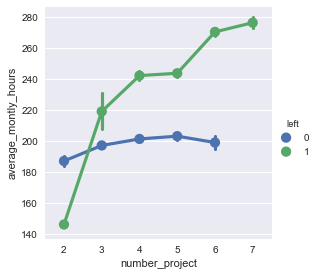

In [20]:
sns.factorplot('number_project','average_montly_hours',hue='left',data=mydataset)

It seems like people with more project and the same time they are spending more time in one month on those project; they left the company.

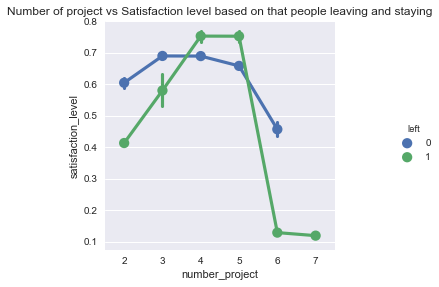

In [21]:
sns.factorplot('number_project','satisfaction_level',hue='left',data=mydataset)
plt.title('Number of project vs Satisfaction level based on that people leaving and staying')

People work on 4 or 5 project have higher satisfaction level as compare to the people work on 6 and 7 projects have lower satisfaction level.

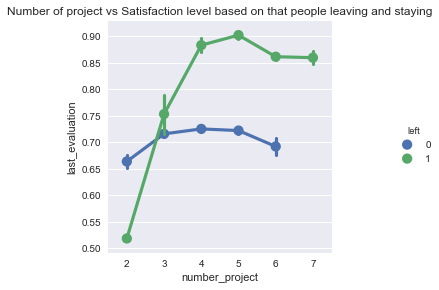

In [22]:
sns.factorplot('number_project','last_evaluation',hue='left',data=mydataset)
plt.title('Number of project vs Satisfaction level based on that people leaving and staying')

### Work Accident

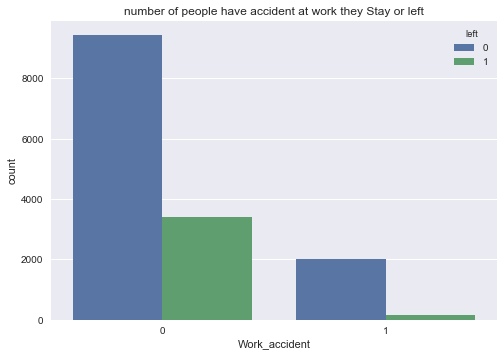

In [23]:
sns.countplot(x="Work_accident",hue='left', data=mydataset)
plt.title('number of people have accident at work they Stay or left')

Employee with no work accident; they didn't left the company.

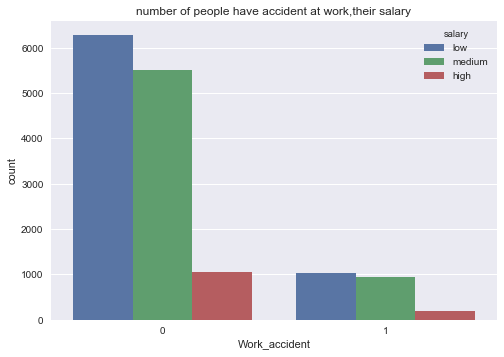

In [24]:
sns.countplot(x="Work_accident",hue='salary', data=mydataset)
plt.title('number of people have accident at work,their salary')

### Time spend ar company

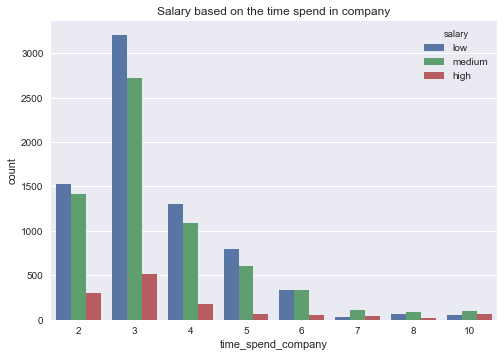

In [25]:
sns.countplot(x="time_spend_company",hue='salary', data=mydataset)
plt.title('Salary based on the time spend in company')

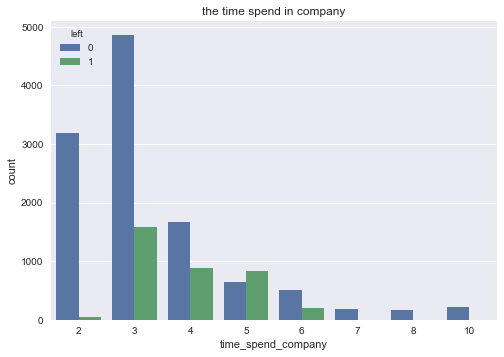

In [26]:
sns.countplot(x="time_spend_company",hue='left', data=mydataset)
plt.title('the time spend in company')

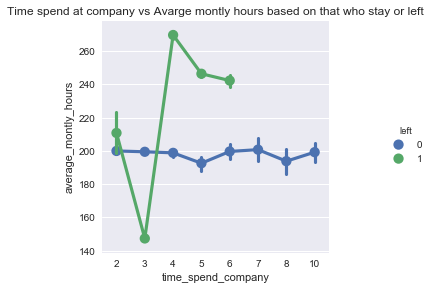

In [27]:
sns.factorplot('time_spend_company','average_montly_hours',hue='left',data=mydataset)
plt.title('Time spend at company vs Avarge montly hours based on that who stay or left')

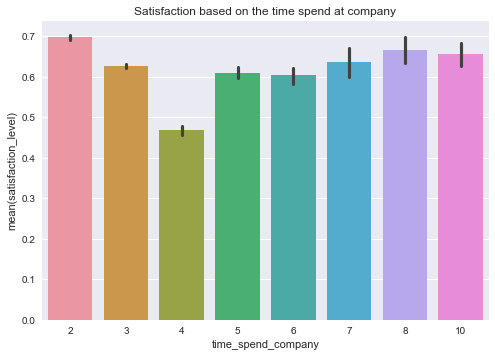

In [28]:
sns.barplot(x = 'time_spend_company', y = 'satisfaction_level', data = mydataset)
sns.plt.title('Satisfaction based on the time spend at company')

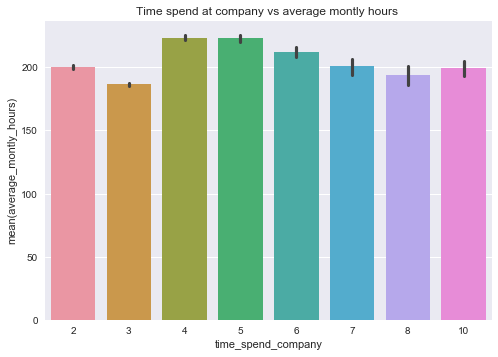

In [29]:
sns.barplot('time_spend_company','average_montly_hours',data=mydataset)
plt.title('Time spend at company vs average montly hours ')

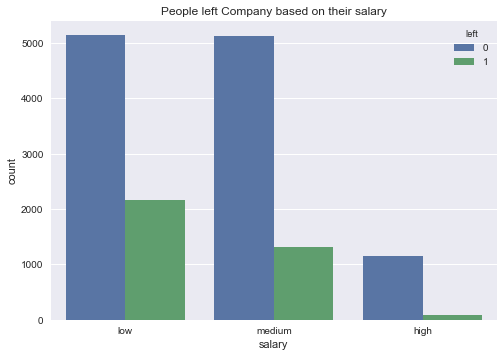

In [30]:
sns.countplot(x="salary",hue='left', data=mydataset)
plt.title('People left Company based on their salary')

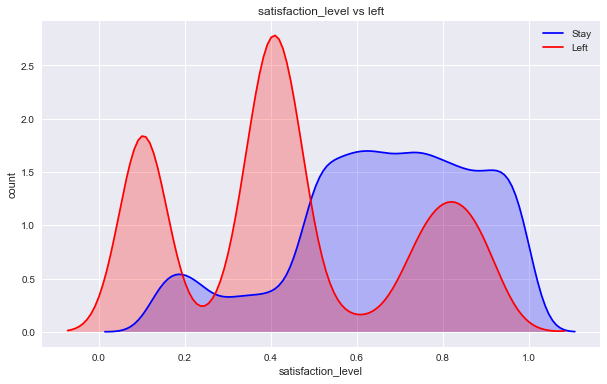

In [31]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=mydataset[mydataset["left"]==0]["satisfaction_level"],color='b',shade=True,label='Stay')
sns.kdeplot(data=mydataset[mydataset["left"]==1]["satisfaction_level"],color='r',shade=True,label='Left')
plt.title('satisfaction_level vs left')
plt.xlabel('satisfaction_level')
plt.ylabel('count')

Employee have satisfaction level between (0.5-1); they stay in company as comparison to the people left the company with same satisfaction level.

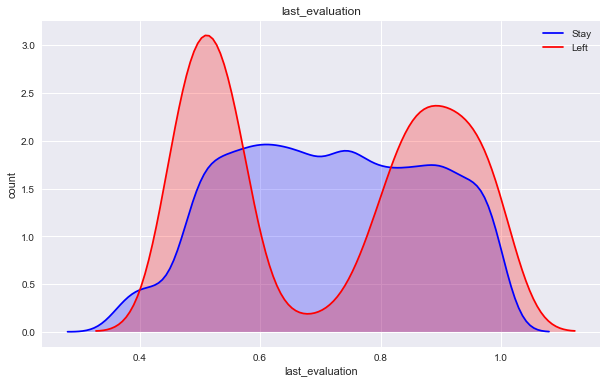

In [32]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=mydataset[mydataset["left"]==0]["last_evaluation"],color='b',shade=True,label='Stay')
sns.kdeplot(data=mydataset[mydataset["left"]==1]["last_evaluation"],color='r',shade=True,label='Left')
plt.title('last_evaluation')
plt.xlabel('last_evaluation')
plt.ylabel('count')

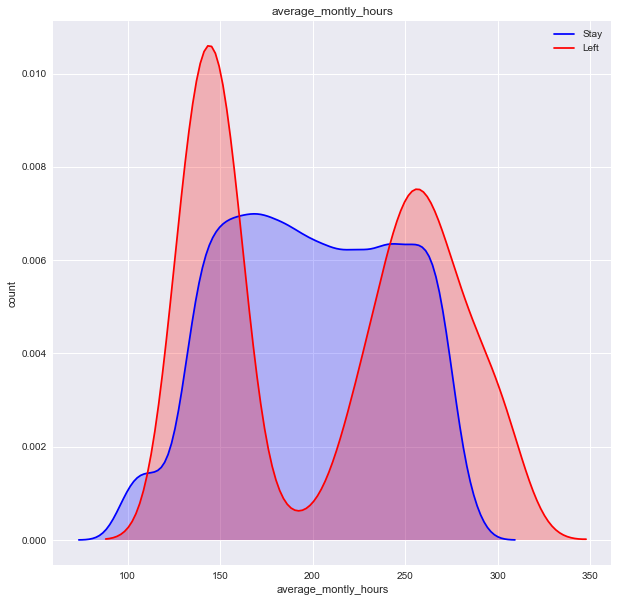

In [33]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=mydataset[mydataset["left"]==0]["average_montly_hours"],color='b',shade=True,label='Stay')
sns.kdeplot(data=mydataset[mydataset["left"]==1]["average_montly_hours"],color='r',shade=True,label='Left')
plt.title('average_montly_hours')
plt.xlabel('average_montly_hours')
plt.ylabel('count')

So, from this it is certainly clear that monthly working hours does not affect much in decision making of the employee to leave the company. Now, let's see if number of projects have any role to play in employee leaving the company.

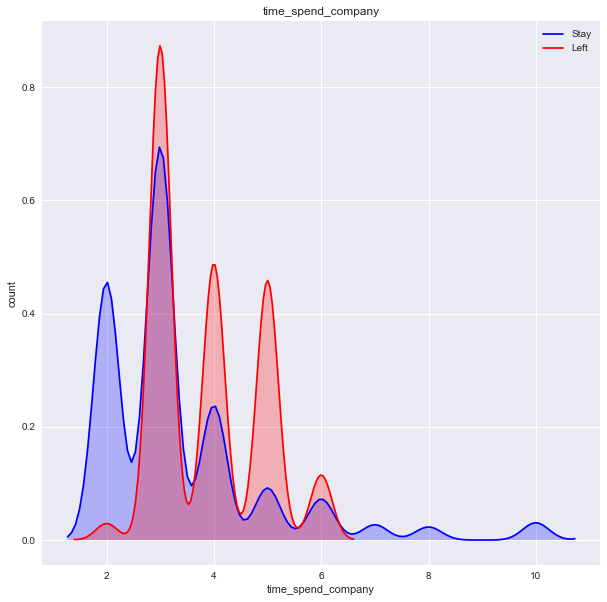

In [34]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=mydataset[mydataset["left"]==0]["time_spend_company"],color='b',shade=True,label='Stay')
sns.kdeplot(data=mydataset[mydataset["left"]==1]["time_spend_company"],color='r',shade=True,label='Left')
plt.title('time_spend_company')
plt.xlabel('time_spend_company')
plt.ylabel('count')

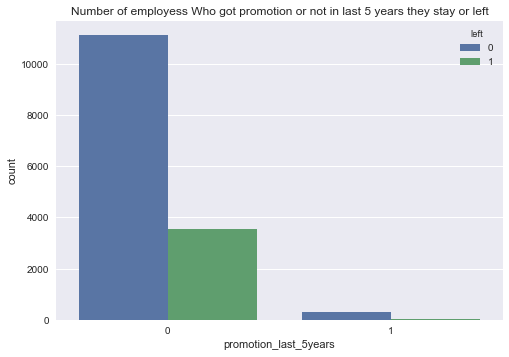

In [35]:
sns.countplot(x="promotion_last_5years",hue='left', data=mydataset)
plt.title('Number of employess Who got promotion or not in last 5 years they stay or left')

Employee who got promotion in last 5 years hardly anybody left the comapny. People with no promotion they have highest number they left the company.

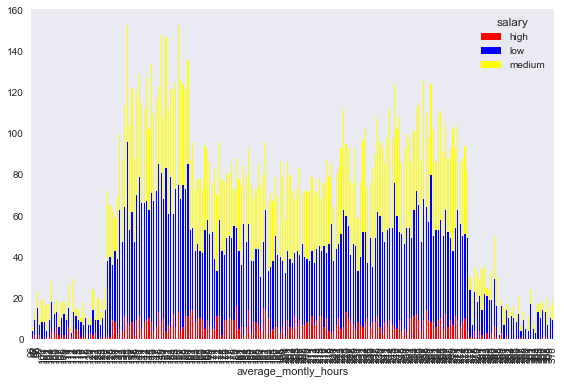

In [36]:
plt.figure(figsize=(20,20))
p = pd.crosstab(mydataset['average_montly_hours'], mydataset['salary'])
p.plot(kind='bar', stacked=True, color=['red','blue','yellow'], grid=False)
plt.tight_layout()

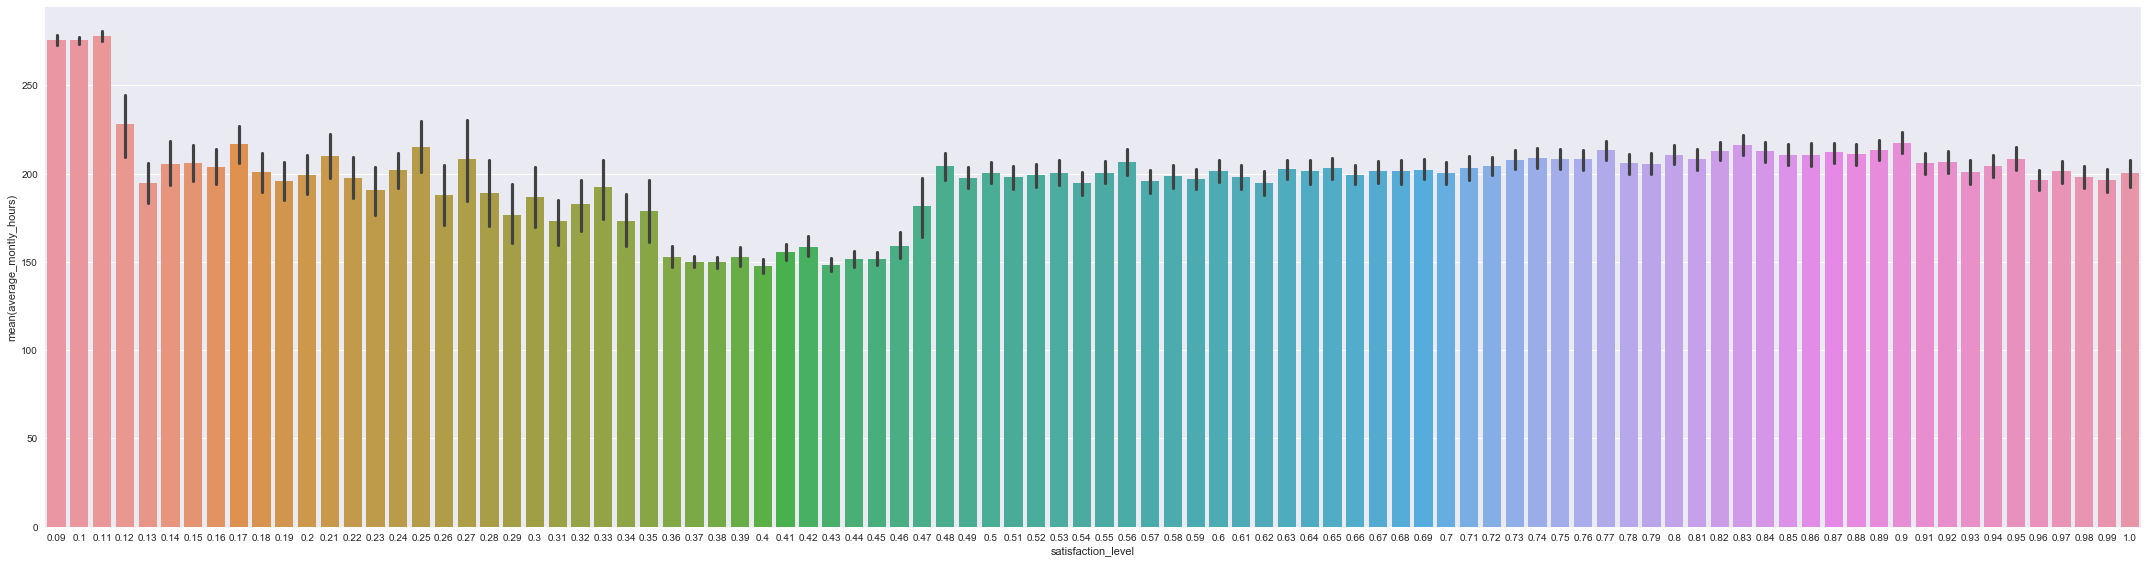

In [37]:
plt.figure(figsize=(30,8))
sns.barplot(x=mydataset['satisfaction_level'],y=mydataset['average_montly_hours'])
plt.tight_layout()

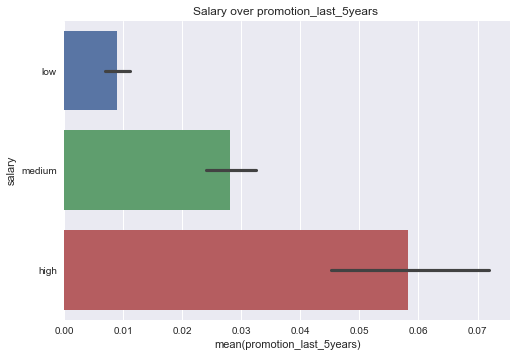

In [38]:
sns.barplot('promotion_last_5years', 'salary', data = mydataset)
sns.plt.title('Salary over promotion_last_5years ')

### Modeling

In [109]:
# now i'm converting string value into Binary form; so we can use them in our proejct
mydataset['salary'].replace({'low':1,'medium':2,'high':3},inplace=True)
mydataset['sales'].replace({'IT':11,'RandD':12,'accounting':13,'hr':14,'management':15,'marketing':16,'product_mng':17,'sales':18,'support':19,'technical':20},inplace=True)

In [80]:
# now i spliting my Traning and testing data
from sklearn.model_selection import train_test_split
panel = mydataset[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','number_project','last_evaluation','time_spend_company']]
x=panel # i tried to use pop command, but itn't let me take value more than 2.
y=mydataset['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,test_size=0.25)
print('Training set volume:', x_train.shape[0])
print('Test set volume:', x_test.shape[0])

('Training set volume:', 11249)
('Test set volume:', 3750)


It's good idea to calculate score for training and test, reasons are: 1-It's often a good sign that your training and test scores are relatively close 2-It's very useful for deciding how to improve your model. 3- looking at the training score can help you prevent overfitting. 4- The higher the score is, the better the model is performing.
I took 

In [81]:
x_train.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,number_project,last_evaluation,time_spend_company
14480,0.38,139,0,2,6,0.86,6
1934,0.78,225,0,2,4,0.93,5
7900,0.56,243,0,2,5,0.71,3
2952,0.96,217,0,2,4,0.62,2
4367,0.83,211,0,1,3,0.53,4


In [82]:
x_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,number_project,last_evaluation,time_spend_company
6723,0.65,226,0,2,5,0.96,2
6473,0.88,166,0,1,3,0.80,2
4679,0.69,214,0,1,3,0.98,2
862,0.41,154,0,1,2,0.47,3
7286,0.87,254,0,1,5,0.76,2


In [83]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
testscoreLR=accuracy_score(y_test,lr.predict(x_test))
print('logistic regression accuracy score:'+str(testscoreLR))
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,lr.predict(x_test)))

logistic regression accuracy score:0.764
[[2641  212]
 [ 673  224]]
             precision    recall  f1-score   support

          0       0.80      0.93      0.86      2853
          1       0.51      0.25      0.34       897

avg / total       0.73      0.76      0.73      3750



In [116]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)
testscoreDT=accuracy_score(y_test,dt.predict(x_test))
print("decision tree accuracy Rate is:"+str(testscoreDT))
print(confusion_matrix(y_test,dt.predict(x_test)))
print(classification_report(y_test,dt.predict(x_test)))

decision tree accuracy Rate is:0.949333333333
[[2735  118]
 [  72  825]]
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      2853
          1       0.87      0.92      0.90       897

avg / total       0.95      0.95      0.95      3750



In [85]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=8)
dt.fit(x_train, y_train)
testscoreDT=accuracy_score(y_test,dt.predict(x_test))
print("decision tree accuracy Rate is:"+str(testscoreDT))
print(confusion_matrix(y_test,dt.predict(x_test)))
print(classification_report(y_test,dt.predict(x_test)))


decision tree accuracy Rate is:0.976533333333
[[2829   24]
 [  64  833]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2853
          1       0.97      0.93      0.95       897

avg / total       0.98      0.98      0.98      3750



In [117]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
testscoreRF=accuracy_score(y_test,dt.predict(x_test)).mean()
print("Random Tree accuracy Rate is:"+str(testscoreRF))
print(confusion_matrix(y_test,rf.predict(x_test)))
print(classification_report(y_test,rf.predict(x_test)))

Random Tree accuracy Rate is:0.949333333333
[[2846    7]
 [  32  865]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2853
          1       0.99      0.96      0.98       897

avg / total       0.99      0.99      0.99      3750



In [87]:
#Gaussian navie bayers
nb=GaussianNB()
nb.fit(x_train,y_train)
testscoreNB=accuracy_score(y_test,nb.predict(x_test))
print('GaussianNB accuracy score:'+str(testscoreNB))
print(confusion_matrix(y_test,nb.predict(x_test)))
print(classification_report(y_test,nb.predict(x_test)))

GaussianNB accuracy score:0.827466666667
[[2478  375]
 [ 272  625]]
             precision    recall  f1-score   support

          0       0.90      0.87      0.88      2853
          1       0.62      0.70      0.66       897

avg / total       0.84      0.83      0.83      3750



In [88]:
#KNN
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
testscoreKN=accuracy_score(y_test,kn.predict(x_test))
print('KNeighborsClassifier accuracy score:'+str(testscoreKN))
print(confusion_matrix(y_test,kn.predict(x_test)))
print(classification_report(y_test,kn.predict(x_test)))

KNeighborsClassifier accuracy score:0.9432
[[2707  146]
 [  67  830]]
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      2853
          1       0.85      0.93      0.89       897

avg / total       0.95      0.94      0.94      3750



In [89]:
#Arrrange the model according tp there accuracy score
models = pd.DataFrame({'Model' : [ 'random Forest', 'Decision Tree', 'Logistic Regression', 'KNN Regression','Gaussian Naive Bays'],'Testing_Score' : [ testscoreRF, testscoreDT, testscoreLR, testscoreKN, testscoreNB],})
models.sort_values(by='Testing_Score', ascending=False)

,Model,Testing_Score
0,random Forest,0.976533
1,Decision Tree,0.976533
3,KNN Regression,0.943200
4,Gaussian Naive Bays,0.827467
2,Logistic Regression,0.764000


Random forest,Decision tree seems like a good model to use for prediction, however its best to have multiple iteration on machine learning to get the best testing and training score. Now let's make predictions.

I'm going to used random forest first and after of that i will use  decision tree and than we can see the difference between the both of them who much they change our prediction. Using both we findout the most ranking of all features to prediction calculation.

In [51]:
#using Random Forest
importances=rf.feature_importances_
f=np.argsort(importances)[::-1]
print ('feature ranking:')
for i in range(x.shape[1]):
     print ("feature no. {}: {} ({})".format(i+1,x.columns[f[i]],importances[f[i]]))


feature ranking:
feature no. 1: satisfaction_level (0.334497954026)
feature no. 2: number_project (0.188536952156)
feature no. 3: time_spend_company (0.18638798068)
feature no. 4: average_montly_hours (0.150783966431)
feature no. 5: last_evaluation (0.127619506421)
feature no. 6: salary (0.0107167088575)
feature no. 7: promotion_last_5years (0.00145693142702)


Above ranking shows that the main reason of employee leaving the company are $1$ Satisfaction level,$2$number of proejct,$3$time spend at company etc.We used Random Forest modeling to have this ranking.

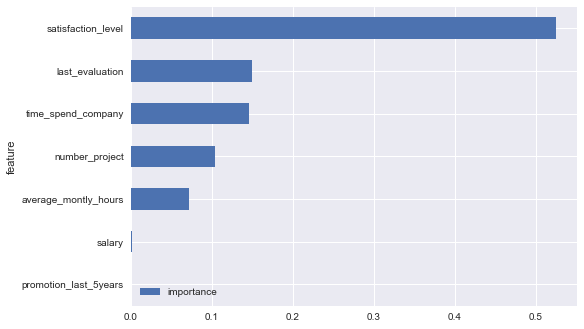

In [53]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot.barh()

In [52]:
#Decision Tree
importances=dt.feature_importances_
f=np.argsort(importances)[::-1]
print ('feature ranking:')
for i in range(x.shape[1]):
     print ("feature no. {}: {} ({})".format(i+1,x.columns[f[i]],importances[f[i]]))

feature ranking:
feature no. 1: satisfaction_level (0.52546172206)
feature no. 2: last_evaluation (0.150481782448)
feature no. 3: time_spend_company (0.146132274565)
feature no. 4: number_project (0.103759601444)
feature no. 5: average_montly_hours (0.0719158964222)
feature no. 6: salary (0.00224872306004)
feature no. 7: promotion_last_5years (0.0)


Above ranking shows that the main reason of employee leaving the company are $1$Satisfaction level,$2$last_evaluation,$3$time spend at company,$4$number of project etc.We used Decision Tree modeling to have this ranking.

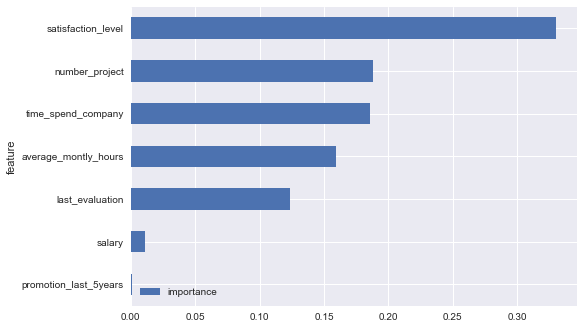

In [104]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot.barh()

In [57]:
y_pred = lr.predict(x_test)
y_prob = lr.predict_proba(x_test)
print(y_prob)

[[ 0.90990411  0.09009589]
 [ 0.9160926   0.0839074 ]
 [ 0.78037416  0.21962584]
 ..., 
 [ 0.79819377  0.20180623]
 [ 0.6807312   0.3192688 ]
 [ 0.56077098  0.43922902]]


In [58]:
y1_pred = dt.predict(x_test)
y1_prob = dt.predict_proba(x_test)
y2_prob = rf.predict_proba(x_test)
y3_prob = nb.predict_proba(x_test)
y4_prob = kn.predict_proba(x_test)

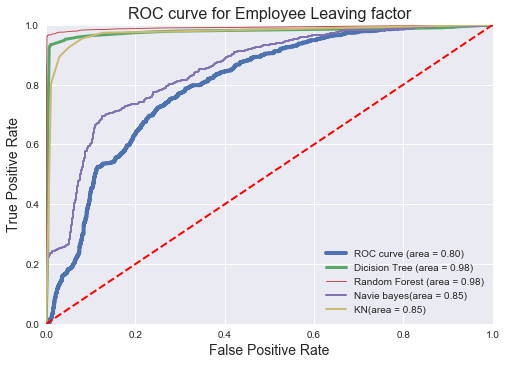

In [59]:
from sklearn.metrics import roc_curve, auc
# area under the curve
Falsepositive, truepositive,_ = (roc_curve(y_test,y_prob[:,1]))
FalsepositiveDT, truepositiveDT,_ = (roc_curve(y_test,y1_prob[:,1]))
FalsepositiveRF, truepositiveRF,_ = (roc_curve(y_test,y2_prob[:,1]))
FalsepositiveNB, truepositiveNB,_ = (roc_curve(y_test,y3_prob[:,1]))
FalsepositiveKN, truepositiveKN,_ = (roc_curve(y_test,y4_prob[:,1]))
ROC_AUC = auc(Falsepositive, truepositive)
ROC_AUCDT = auc(FalsepositiveDT, truepositiveDT)
ROC_AUCRF = auc(FalsepositiveDT, truepositiveDT)
ROC_AUCNB = auc(FalsepositiveNB, truepositiveNB)
ROC_AUCKN = auc(FalsepositiveKN, truepositiveKN)
#Plottig
plt.plot(Falsepositive, truepositive, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot(FalsepositiveDT, truepositiveDT, label='Dicision Tree (area = %0.2f)' % ROC_AUCDT, linewidth=3)
plt.plot(FalsepositiveRF, truepositiveRF, label='Random Forest (area = %0.2f)' % ROC_AUCRF, linewidth=1)
plt.plot(FalsepositiveNB, truepositiveNB, label='Navie bayes(area = %0.2f)' % ROC_AUCNB, linewidth=2)
plt.plot(FalsepositiveKN, truepositiveKN, label='KN(area = %0.2f)' % ROC_AUCNB, linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve for Employee Leaving factor', fontsize=16)
plt.legend(loc="lower right")
plt.show()

Random forest give us the better Accuracy curve as comparison to other model. 

#### Prediciton Model

We are to use the actual testing data for this Prediciton model and used decision tree Model for this. Because they have higher number of accuracy and better ROC also as comparison to other model.

In [128]:
test_predict = x_test.iloc[0:10,:] # you can change the 10 to any number you want till 14999
realpr = dt.predict(test_predict) # we are using real prediction value
for i in realpr:
    print (i)

0
0
0
1
0
0
0
0
0
0


This Predicted value for staying. Now, we will apply same method on real data.

In [127]:
y_test.iloc[0:10] # It randmly select 10 employee.

6723    0
6473    0
4679    0
862     1
7286    0
8127    0
3017    0
3087    0
6425    0
2250    0
Name: left, dtype: int64

### Predicited Probability:- 

This is my extra work that i didn't plan for this proejct but after having a dicussion with you i spend little bit more time and than try to implement it.

you can calculate the predicted probability using one of any model, but i used here Decision Tree Model.To execute this we need to reload our data for prediction.This is the most diffcult part of all over the project where i spend so many of my time to code this part and try to under stand how i can do this using real data. 

In [ ]:
# Load our actual value for prediction
dataf = pd.get_dummies(mydataset)

In [102]:
# we need to provide information of 
left = dataf[dataf['left'] == 1]
left1 = pd.get_dummies(leave)
            
c = left1
a = c['left'].values
c = c.drop(['left'],axis=1)
b= c.values
pred = dt.predict_proba(q[:, :7]) # we have 8 model input so, i selected 7 input
## i used dicison tree for my data
# number of employees that definitely are leaving
sum(pred[:,1]==1)

957

In [103]:
left['Will leave the job'] = pred[:,1]
# you can change this leaving prob,but i select 45%.
left[left['Will leave the job']>=0.45]

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,Will leave the job
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1.0
6,0.10,0.77,6,247,4,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1.0
11,0.11,0.81,6,305,4,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1.0
18,0.45,0.51,2,160,3,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1.0
20,0.11,0.83,6,282,4,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1.0
22,0.09,0.95,6,304,4,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1.0
30,0.09,0.62,6,294,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
35,0.10,0.94,6,255,4,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1.0
38,0.11,0.89,6,306,4,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1.0
43,0.10,0.80,7,281,4,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1.0


##### Changing Accuracy Score using Variable.

I just want to show that removing 2-3 factors affect our accuracy score so much. If we want better accuracy socre, we have to consider the all factors. 

When we remove one or two factor how does it affect our accuracy output now i'm going to keep only 4 input factor and remove all of them. Than see my accuracy score.

In [60]:
#from sklearn.model_selection import train_test_split
panel12= mydataset[['satisfaction_level','average_montly_hours','number_project','time_spend_company']]
x1=panel12 # i tried to use pop command, but itn't let me take value more than 2.
y1=mydataset['left']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42,test_size=0.25)
print('Training set volume:', x1_train.shape[0])
print('Test set volume:', x1_test.shape[0])

('Training set volume:', 11249)
('Test set volume:', 3750)


In [61]:
#Logistic Regression
lr1=LogisticRegression()
lr1.fit(x1_train,y1_train)
testscoreLR1=accuracy_score(y1_test,lr1.predict(x1_test))
print('logistic regression accuracy score:'+str(testscoreLR1))
print(confusion_matrix(y1_test,lr1.predict(x1_test)))
print(classification_report(y1_test,lr1.predict(x1_test)))

logistic regression accuracy score:0.758933333333
[[2623  230]
 [ 674  223]]
             precision    recall  f1-score   support

          0       0.80      0.92      0.85      2853
          1       0.49      0.25      0.33       897

avg / total       0.72      0.76      0.73      3750



In [66]:
#Decision tree
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(max_depth=8)
dt1.fit(x1_train, y1_train)
testscoreDT1=accuracy_score(y1_test,dt1.predict(x1_test))
print("decision tree accuracy Rate is:"+str(testscoreDT1))
print(confusion_matrix(y1_test,dt1.predict(x1_test)))
print(classification_report(y1_test,dt1.predict(x1_test)))



decision tree accuracy Rate is:0.974933333333
[[2834   19]
 [  75  822]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      2853
          1       0.98      0.92      0.95       897

avg / total       0.97      0.97      0.97      3750



In [67]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1= RandomForestClassifier(n_estimators=100)
rf1.fit(x1_train, y1_train)
testscoreRF1=accuracy_score(y1_test,dt1.predict(x1_test)).mean()
print("decision tree accuracy Rate is:"+str(testscoreRF1))
print(confusion_matrix(y1_test,rf1.predict(x1_test)))
print(classification_report(y1_test,rf1.predict(x1_test)))



decision tree accuracy Rate is:0.974933333333
[[2838   15]
 [  35  862]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2853
          1       0.98      0.96      0.97       897

avg / total       0.99      0.99      0.99      3750



In [64]:
nb1=GaussianNB()
nb1.fit(x1_train,y1_train)
testscoreNB1=accuracy_score(y1_test,nb1.predict(x1_test))
print('GaussianNB accuracy score:'+str(testscoreNB1))
print(confusion_matrix(y1_test,nb1.predict(x1_test)))
print(classification_report(y1_test,nb1.predict(x1_test)))

GaussianNB accuracy score:0.7808
[[2598  255]
 [ 567  330]]
             precision    recall  f1-score   support

          0       0.82      0.91      0.86      2853
          1       0.56      0.37      0.45       897

avg / total       0.76      0.78      0.76      3750

